## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data

data = pd.read_csv('Credit_card.csv')

In [3]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [4]:
# shape of dataset
data.shape

(1548, 19)

## Exploratory Data Analysis (EDA)

In [5]:
# check is there any null values
data.isnull().sum()

,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [6]:
data.Type_Occupation.value_counts()

,count
Type_Occupation,
Laborers,268
Core staff,174
Managers,136
Sales staff,122
Drivers,86
High skill tech staff,65
Medicine staff,50
Accountants,44
Security staff,25


In [7]:
data.select_dtypes(include="int").head()

,Ind_ID,CHILDREN,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,0,365243,1,0,0,0,2,1
1,5009744,0,-586,1,1,1,0,2,1
2,5009746,0,-586,1,1,1,0,2,1
3,5009749,0,-586,1,1,1,0,2,1
4,5009752,0,-586,1,1,1,0,2,1


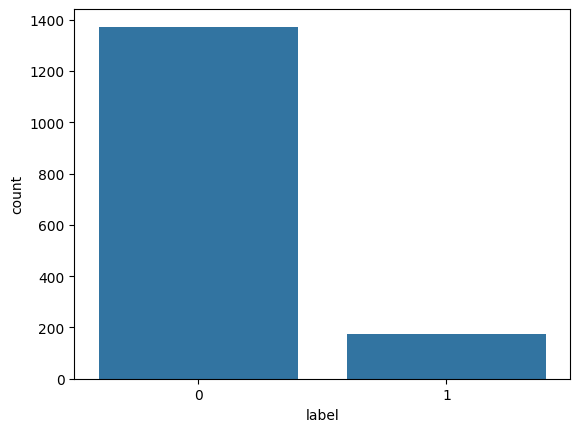

In [8]:
# check the label counts
sns.countplot(x='label' , data=data )
plt.show()

In [9]:
data.label.value_counts()

,count
label,
0,1373
1,175


In [10]:
# Group by with children & label
data.groupby(['CHILDREN'])['label'].value_counts(normalize=True).reset_index()

,CHILDREN,label,proportion
0,0,0,0.884510
1,0,1,0.115490
2,1,0,0.881967
3,1,1,0.118033
4,2,0,0.910448
5,2,1,0.089552
6,3,0,1.000000
7,4,1,1.000000
8,14,0,1.000000


In [11]:
# Group by with children,education & label
data.groupby(['CHILDREN','EDUCATION'])['label'].value_counts(normalize=True).reset_index()

,CHILDREN,EDUCATION,label,proportion
0,0,Higher education,0,0.847826
1,0,Higher education,1,0.152174
2,0,Incomplete higher,0,0.976744
3,0,Incomplete higher,1,0.023256
4,0,Lower secondary,0,0.687500
5,0,Lower secondary,1,0.312500
6,0,Secondary / secondary special,0,0.896825
7,0,Secondary / secondary special,1,0.103175
8,1,Academic degree,0,1.000000
9,1,Higher education,0,0.907216


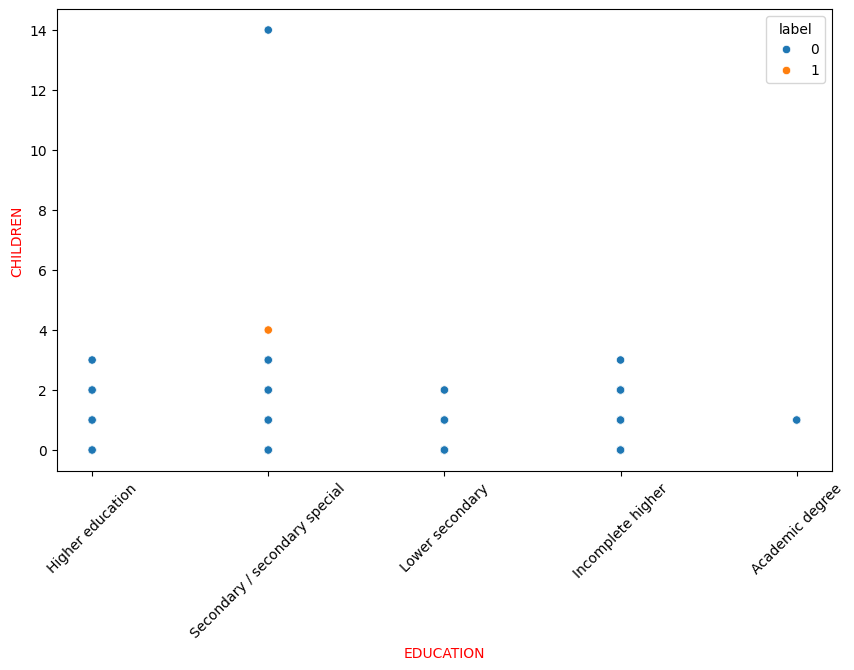

In [12]:
# check values by scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='EDUCATION' , y='CHILDREN' , hue='label' , data=data)
plt.xlabel('EDUCATION', c='r')
plt.ylabel('CHILDREN',c='r')
plt.xticks(rotation=45)
plt.show()

In [13]:
data.EDUCATION.value_counts()

,count
EDUCATION,
Secondary / secondary special,1031
Higher education,426
Incomplete higher,68
Lower secondary,21
Academic degree,2


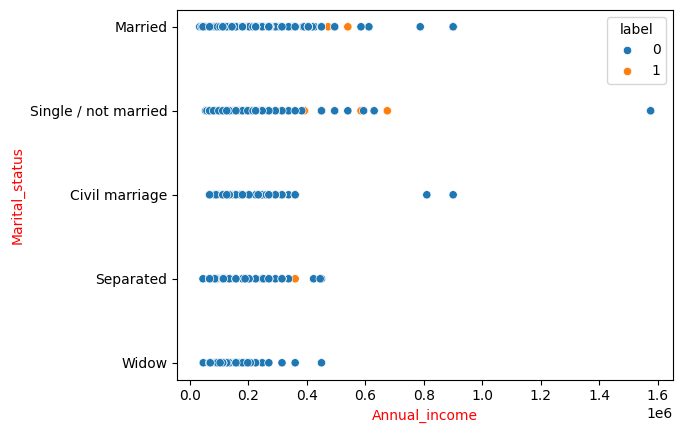

In [14]:
sns.scatterplot(x='Annual_income' , y='Marital_status' , hue='label' , data = data)
plt.xlabel('Annual_income', c='r')
plt.ylabel('Marital_status',c='r')
plt.show()

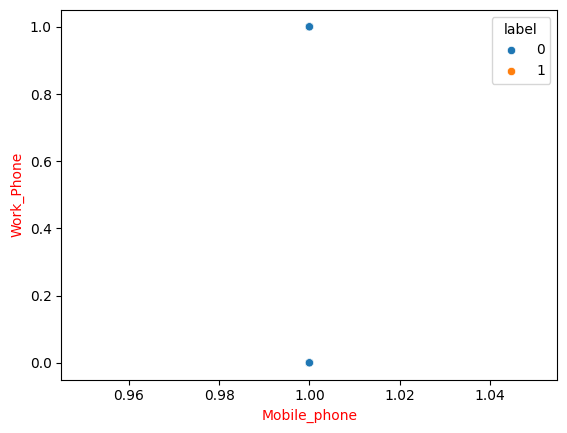

In [15]:
sns.scatterplot(x='Mobile_phone' , y='Work_Phone' , hue='label' , data=data)
plt.xlabel('Mobile_phone', c='r')
plt.ylabel('Work_Phone',c='r')
plt.show()

In [16]:
data.Mobile_phone.value_counts()

,count
Mobile_phone,
1,1548


In [17]:
data.Work_Phone.value_counts()

,count
Work_Phone,
0,1226
1,322


In [18]:
data.Phone.value_counts(normalize=True)

,proportion
Phone,
0,0.690568
1,0.309432


In [19]:
data.groupby(['Work_Phone','Phone'])['label'].value_counts(normalize=True).reset_index()

,Work_Phone,Phone,label,proportion
0,0,0,0,0.884089
1,0,0,1,0.115911
2,0,1,0,0.891697
3,0,1,1,0.108303
4,1,0,0,0.908333
5,1,0,1,0.091667
6,1,1,0,0.881188
7,1,1,1,0.118812


In [20]:
data.groupby([ 'Housing_type','Type_Occupation'])['label'].value_counts(normalize=True).reset_index()

,Housing_type,Type_Occupation,label,proportion
0,Co-op apartment,Core staff,0,0.600000
1,Co-op apartment,Core staff,1,0.400000
2,House / apartment,Accountants,0,0.875000
3,House / apartment,Accountants,1,0.125000
4,House / apartment,Cleaning staff,0,0.941176
...,...,...,...,...
70,With parents,Managers,0,1.000000
71,With parents,Medicine staff,0,1.000000
72,With parents,Private service staff,0,1.000000
73,With parents,Sales staff,0,0.916667


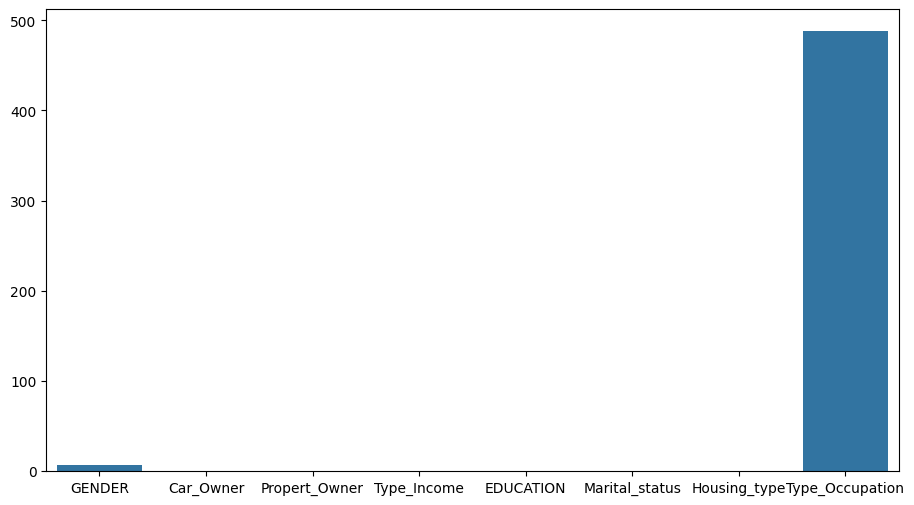

In [21]:
plt.figure(figsize=(11,6))
sns.barplot(data.select_dtypes(exclude=np.number).isnull().sum())
plt.show()

In [22]:
data.Type_Occupation.value_counts()

,count
Type_Occupation,
Laborers,268
Core staff,174
Managers,136
Sales staff,122
Drivers,86
High skill tech staff,65
Medicine staff,50
Accountants,44
Security staff,25


In [23]:
data.GENDER.value_counts()

,count
GENDER,
F,973
M,568


In [24]:
cat_var = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']

In [25]:
data.select_dtypes(exclude=np.number).isnull().sum()

,0
GENDER,7
Car_Owner,0
Propert_Owner,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Type_Occupation,488


In [26]:
# Replace the value to categorigal features by mode
for col in cat_var:
    data[col].fillna(data[col].mode()[0], inplace = True)

In [27]:
data.select_dtypes(exclude=np.number).isnull().sum()

,0
GENDER,0
Car_Owner,0
Propert_Owner,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Type_Occupation,0


In [28]:
data.select_dtypes(include=np.number).isnull().sum()

,0
Ind_ID,0
CHILDREN,0
Annual_income,23
Birthday_count,22
Employed_days,0
Mobile_phone,0
Work_Phone,0
Phone,0
EMAIL_ID,0
Family_Members,0


In [29]:
data.Annual_income.mean()

np.float64(191399.3262295082)

In [30]:
data.Type_Occupation.value_counts()

,count
Type_Occupation,
Laborers,756
Core staff,174
Managers,136
Sales staff,122
Drivers,86
High skill tech staff,65
Medicine staff,50
Accountants,44
Security staff,25


In [31]:
data.groupby('Type_Occupation')['Annual_income'].min().sort_index(ascending=False)


,Annual_income
Type_Occupation,
Waiters/barmen staff,67500.0
Security staff,67500.0
Secretaries,90000.0
Sales staff,45000.0
Realty agents,180000.0
Private service staff,81000.0
Medicine staff,45000.0
Managers,103500.0
Low-skill Laborers,81000.0


In [32]:
data.Annual_income.mode()

,Annual_income
0,135000.0


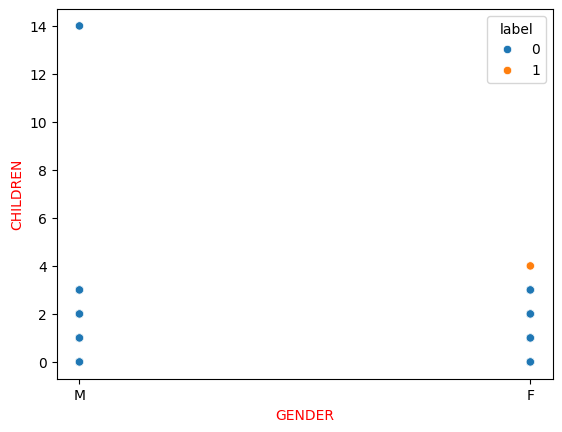

In [33]:
sns.scatterplot(x='GENDER',y='CHILDREN',hue='label',data=data)
plt.xlabel('GENDER',c='r')
plt.ylabel('CHILDREN',c='r')
plt.show()

In [34]:
data.CHILDREN.value_counts()

,count
CHILDREN,
0,1091
1,305
2,134
3,16
4,1
14,1


In [35]:
data.Birthday_count.median()

-15661.5

In [36]:
# convert Birthday count to age
data['age'] = (data['Birthday_count']/365).abs().round()

In [37]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'age'],
      dtype='object')

In [38]:
data.Employed_days

,Employed_days
0,365243
1,-586
2,-586
3,-586
4,-586
...,...
1543,-2182
1544,-1209
1545,-2477
1546,-645


In [39]:
data.groupby(['Work_Phone','Phone','EMAIL_ID'])['label'].value_counts(normalize=True).reset_index()

,Work_Phone,Phone,EMAIL_ID,label,proportion
0,0,0,0,0,0.882217
1,0,0,0,1,0.117783
2,0,0,1,0,0.903614
3,0,0,1,1,0.096386
4,0,1,0,0,0.918367
5,0,1,0,1,0.081633
6,0,1,1,0,0.687500
7,0,1,1,1,0.312500
8,1,0,0,0,0.898148
9,1,0,0,1,0.101852


In [40]:
data.EMAIL_ID.value_counts()

,count
EMAIL_ID,
0,1405
1,143


In [41]:
data.Employed_days

,Employed_days
0,365243
1,-586
2,-586
3,-586
4,-586
...,...
1543,-2182
1544,-1209
1545,-2477
1546,-645


In [42]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Laborers,2,1,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,Laborers,2,1,NaN
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1,37.0


In [43]:
# convert Employee days to Experience
data['exp'] = (data['Employed_days']/365).abs().round()

In [44]:
data.exp.value_counts()

,count
exp,
1001.0,261
2.0,132
1.0,130
4.0,121
3.0,118
5.0,108
6.0,92
7.0,82
9.0,67


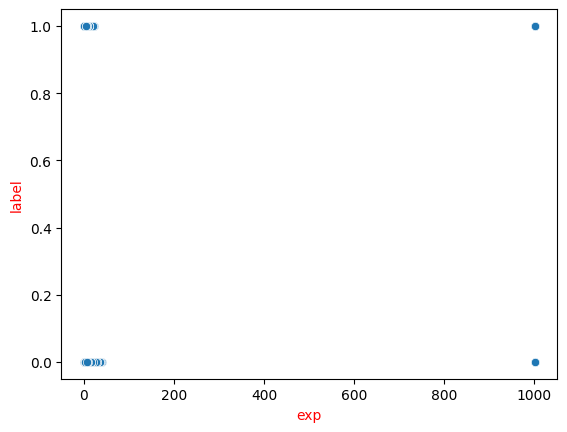

In [45]:
sns.scatterplot(x='exp' , y='label' , data=data )
plt.xlabel('exp', c='r')
plt.ylabel('label',c='r')
plt.show()

In [46]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,exp
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.0,1001.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.0,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,NaN,2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.0,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.0,2.0


In [47]:
data.Car_Owner.value_counts()

,count
Car_Owner,
N,924
Y,624


In [48]:
# remove unwanted columns

data1 = data.drop(columns=['Ind_ID' , 'Mobile_phone' , 'Birthday_count' , 'Employed_days'] , axis=1 , inplace=True)

In [49]:
data[:3]

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,exp
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,Laborers,2,1,51.0,1001.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,37.0,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,NaN,2.0


In [50]:
data.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'age', 'exp'],
      dtype='object')

In [51]:
data.label

,label
0,1
1,1
2,1
3,1
4,1
...,...
1543,0
1544,0
1545,0
1546,0


In [52]:
Y =data['label']

In [53]:
Y

,label
0,1
1,1
2,1
3,1
4,1
...,...
1543,0
1544,0
1545,0
1546,0


In [54]:
re = data.drop('label' , axis=1 , inplace=True)

In [55]:
data.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'age', 'exp'],
      dtype='object')

In [56]:
data.select_dtypes(exclude=np.number).isnull().sum()

,0
GENDER,0
Car_Owner,0
Propert_Owner,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Type_Occupation,0


In [57]:
data.isnull().sum()

,0
GENDER,0
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Work_Phone,0


In [58]:
cat_var

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Type_Occupation']

In [59]:
num_var = ['CHILDREN' , 'Annual_income' , 'Work_Phone' , 'Phone' , 'EMAIL_ID' , 'Family_Members' , 'age' , 'exp']

In [60]:
X = data

In [61]:
y = Y

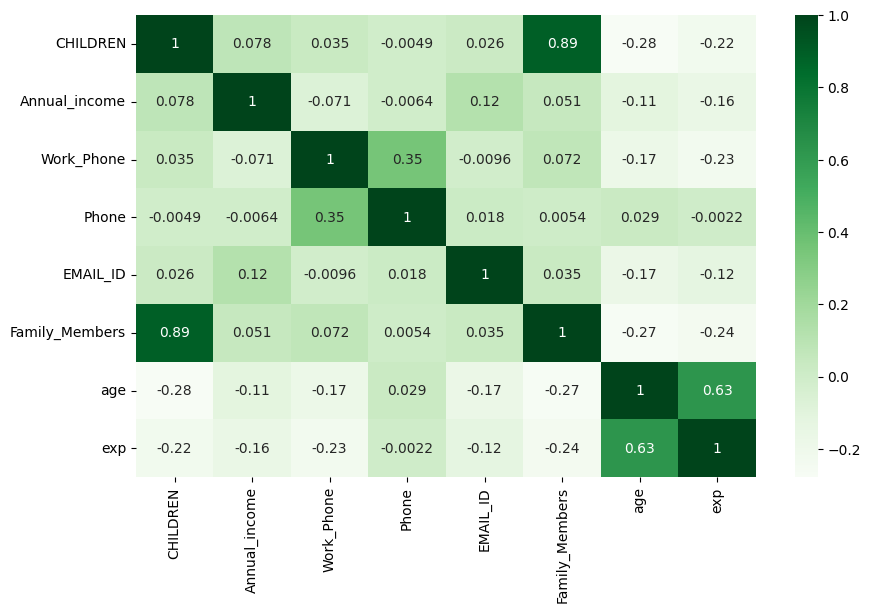

In [62]:
# Heatmap for finding Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X.select_dtypes(include=np.number).corr(), annot=True , cmap='Greens')
plt.show()

##  spliting

In [63]:
X_train , X_val , y_train , y_val = train_test_split( X,y , test_size=0.3 , random_state=42 )

In [64]:
X_train.shape

(1083, 16)

In [65]:
X.shape

(1548, 16)

In [66]:
X.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'age', 'exp'],
      dtype='object')

## Pipeline

In [67]:
cat_trans = Pipeline(steps=[('imputer' , SimpleImputer(strategy='most_frequent')),
                           ('encoding' , OneHotEncoder(handle_unknown='ignore'))])

In [68]:
num_trans = Pipeline(steps=[('imputer' , SimpleImputer(strategy='most_frequent')),
                           ('scaling' , StandardScaler())])

In [69]:
preprocessor = ColumnTransformer(transformers=[
    ('cats_transformer' , cat_trans , cat_var),
    ('nums_trans' , num_trans , num_var)
])

## Modeling

### LogisticRegression

In [70]:
model_pipe = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('regression' , LogisticRegression())
])

In [71]:
model_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('regression', LogisticRegression())])

In [72]:
# Model Fitting
model_pipe.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('regression', LogisticRegression())])

In [73]:
train_pred = model_pipe.predict(X_train)

In [74]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1083, 16), (465, 16), (1083,), (465,))

In [75]:
model_pipe.predict_proba(X_train)

array([[0.91312936, 0.08687064],
       [0.74023612, 0.25976388],
       [0.95664784, 0.04335216],
       ...,
       [0.89919495, 0.10080505],
       [0.91064865, 0.08935135],
       [0.91303639, 0.08696361]])

In [76]:
val_pred = model_pipe.predict(X_val)

In [77]:
val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
confusion_matrix(y_train, train_pred)

array([[950,   1],
       [125,   7]])

In [79]:
confusion_matrix(y_val, val_pred)

array([[422,   0],
       [ 42,   1]])

In [80]:
accuracy_score(y_train, train_pred)

0.8836565096952909

In [81]:
accuracy_score(y_val, val_pred)

0.9096774193548387

In [82]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       951
           1       0.88      0.05      0.10       132

    accuracy                           0.88      1083
   macro avg       0.88      0.53      0.52      1083
weighted avg       0.88      0.88      0.84      1083



## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors = 5, metric='euclidean'))
])

In [84]:
model_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('knn', KNeighborsClassifier(metric='euclidean'))])

In [85]:
train_pred_knn = model_knn_pipeline.predict(X_train)
val_pred_knn = model_knn_pipeline.predict(X_val)

In [86]:
# Train Accuracy
accuracy_score(y_train, train_pred_knn)

0.9141274238227147

In [87]:
# Test Accuracy
accuracy_score(y_val, val_pred_knn)

0.8795698924731182

In [88]:
# Confusion Matrix
confusion_matrix(y_train, train_pred_knn)

array([[938,  13],
       [ 80,  52]])

In [89]:
# Test Confusion Matrix
confusion_matrix(y_val, val_pred_knn)

array([[405,  17],
       [ 39,   4]])

## Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
model_naive = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('naive', BernoulliNB())
])

In [91]:
model_naive.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('naive', BernoulliNB())])

In [113]:
def result (model,alg,X_train, X_val, y_train, y_val):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_val)
  print(alg)
  print(f'\nTrain Accuracy: {accuracy_score(train_pred, y_train)}')
  print(f'Confusion Matrix : \n{confusion_matrix(y_train, train_pred)}')
  print('=======================================')
  print(f'Test Accuracy: {accuracy_score(test_pred, y_val)}')
  print(f'Confusion Matrix : \n{confusion_matrix(test_pred, y_val)}')


In [93]:
result(model_naive,'KNN',X_train, X_val, y_train, y_val)

KNN

Train Accuracy: 0.8753462603878116
Confusion Matrix : 
[[941  10]
 [125   7]]
Test Accuracy: 0.9010752688172043
Confusion Matrix : 
[[416  40]
 [  6   3]]


## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
model_tree = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('tree', DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=15, min_samples_leaf=3,max_features='log2'))
])

In [95]:
model_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features='log2', min_samples_leaf=3,
                                        min_samples_split=15))])

In [97]:
result(model_tree,'Decision Tree', X_train,X_val,y_train,y_val)

Decision Tree

Train Accuracy: 0.8808864265927978
Confusion Matrix : 
[[944   7]
 [122  10]]
Test Accuracy: 0.9075268817204301
Confusion Matrix : 
[[420  41]
 [  2   2]]


## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('RF', RandomForestClassifier(n_estimators=4,bootstrap=False,criterion='entropy', max_depth=7, min_samples_split=14, min_samples_leaf=4,max_features='log2'))
])

In [99]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('RF',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_depth=7, max_features='log2',
                                        min_samples_leaf=4,
                                        min_samples_split=14,
                                        n_estimators=4))])

In [101]:
result(model_rf,'RandomForest', X_train,X_val,y_train, y_val)

RandomForest

Train Accuracy: 0.8781163434903048
Confusion Matrix : 
[[951   0]
 [132   0]]
Test Accuracy: 0.9075268817204301
Confusion Matrix : 
[[422  43]
 [  0   0]]


## Boosting

In [111]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('RF', AdaBoostClassifier(n_estimators= 6, learning_rate=0.01, random_state=42))
])

In [112]:
model_ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('RF',
                 AdaBoostClassifier(learning_rate=0.01, n_estimators=6,
                                    random_state=42))])

In [114]:
result(model_ada,'ADABOOST', X_train,X_val,y_train,y_val)

ADABOOST

Train Accuracy: 0.8781163434903048
Confusion Matrix : 
[[951   0]
 [132   0]]
Test Accuracy: 0.9075268817204301
Confusion Matrix : 
[[422  43]
 [  0   0]]


## SVM

In [116]:
from sklearn.svm import SVC
model_svm = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('SVM', SVC(kernel= 'linear',random_state=42))
])

In [117]:
model_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cats_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'Car_Owner',
                                                   'Propert_Owner',
                                                   'Type_Income', 'EDUCATION',
                                                   'Marital_status',
                                                   'Housing_type',
                                                   'Type_Occupation']),
                                                 ('nums_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['CHILDREN', 'Annual_income',
                                                   'Work_Phone', 'Phone',
                                                   'EMAIL_ID', 'Family_Members',
                                                   'age', 'exp'])])),
                ('SVM', SVC(kernel='linear', random_state=42))])

In [118]:
result(model_svm, 'SVM', X_train,X_val,y_train,y_val)

SVM

Train Accuracy: 0.8836565096952909
Confusion Matrix : 
[[950   1]
 [125   7]]
Test Accuracy: 0.9118279569892473
Confusion Matrix : 
[[422  41]
 [  0   2]]


## All Algorithms Result

In [ ]:
# Model Alogorithms             Train                            Test

# SVM                            0.88                             0.91
# KNearest Neibours (KNN)        0.98                             0.98
# Decision Tree                  0.87                             0.90
# RandomForest                   0.87                             0.90
# GRADIENT BOOSTING              1.00                             0.99
# ADABOOST                       0.87                             0.90
# Logistic Regression            0.88                             0.90
# Naive Bayes                    0.87                             0.90